In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [47]:
img=cv2.imread('elephant.jpg')

In [48]:

img=cv2.imread('C:\jupyter/elephant1.jpeg')
print(img)
original_img=img



[[[ 59  11   5]
  [ 59  11   5]
  [ 58  12   5]
  ...
  [ 53  17   7]
  [ 50  15   5]
  [ 45  13   0]]

 [[ 62  13   5]
  [ 62  13   5]
  [ 60  13   5]
  ...
  [ 52  16   6]
  [ 47  14   5]
  [ 41  10   1]]

 [[ 67  15   3]
  [ 67  15   3]
  [ 65  15   3]
  ...
  [ 50  12   7]
  [ 41  10   7]
  [ 37   8   4]]

 ...

 [[137 119  66]
  [135 120  64]
  [137 119  66]
  ...
  [ 59  83  43]
  [ 63  80  46]
  [ 63  80  46]]

 [[138 121  70]
  [136 122  69]
  [138 121  70]
  ...
  [ 52  75  37]
  [ 54  75  37]
  [ 54  75  37]]

 [[136 122  70]
  [136 122  70]
  [136 122  70]
  ...
  [ 54  74  39]
  [ 54  75  37]
  [ 54  75  37]]]


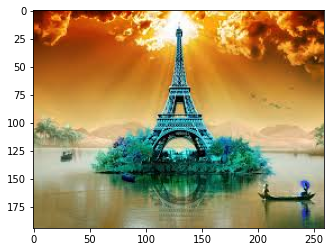

In [49]:
plt.imshow(img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.show()

In [50]:
print(img.shape)

(194, 259, 3)


In [51]:
#flatten each channel in linear array

In [52]:
all_pixels=img.reshape((194*259, 3))

In [53]:
print(all_pixels.shape)

(50246, 3)


In [54]:
from sklearn.cluster import KMeans

In [55]:
dominant_colors=4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
center=km.cluster_centers_
center=np.array(center, dtype='uint8')

In [57]:
print(center)

[[ 28 109 190]
 [ 56  72  31]
 [145 196 215]
 [105 142 128]]


In [58]:
#plot what colors are these values?

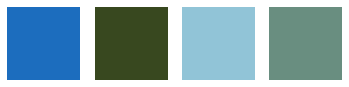

In [59]:
i=1
colors=[]
for each_col in center:
   
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [60]:
#segmenting out original image

In [61]:
new_img=np.zeros((194*259, 3),dtype='uint8')
print(new_img)
colors

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


[array([ 28, 109, 190], dtype=uint8),
 array([56, 72, 31], dtype=uint8),
 array([145, 196, 215], dtype=uint8),
 array([105, 142, 128], dtype=uint8)]

In [62]:
a=km.labels_
print(len(a))

50246


In [63]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((original_img.shape))

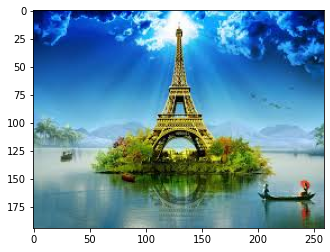

In [68]:
plt.imshow(img)
plt.show()


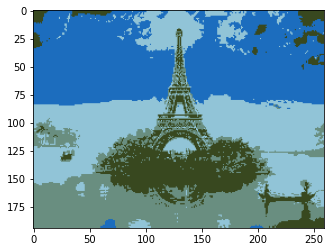

In [69]:
plt.imshow(new_img)
plt.show()